# 2.1 Activity

For our **Unit 2** activities, we will work with snowpack, precipitation, and temperature measurements from 2014 to 2019 at the Central Sierra Snow Laboratory in Sierra Nevada, California.

Our focus in this activity will be learning the basics of Pandas to manipulate or "wrangle" our data so that we can initiate the Exploratory Data Analysis in **Lesson 2.3**.

By the end of this activity, you will:

1. Explore the dataset and discover anomalies.
2. Visualize features using Pandas.
3. Use iterators to transform columns.
4. Write conditional statements to recode variables.
5. Reflect on what the data manipulation conveyed.

**Acknowledgements**

Osterhuber, Randall; Schwartz, Andrew (2021), Snowpack, precipitation, and temperature measurements at the Central Sierra Snow Laboratory for water years 1971 to 2019, Dryad, Dataset, https://doi.org/10.6078/D1941T

## Task 1: Setup Workspace

Import Pandas and read in the data file to a variable called `precip`. Return the first few rows of data to ensure it has loaded correctly.

In [1]:
!gdown 1dbxZlCRbq_IitKujRkC7NKiu8RoRlP7U

Downloading...
From: https://drive.google.com/uc?id=1dbxZlCRbq_IitKujRkC7NKiu8RoRlP7U
To: /content/Snowfall.csv
100% 75.5k/75.5k [00:00<00:00, 56.7MB/s]


In [2]:
import pandas as pd
precip = pd.read_csv('/content/Snowfall.csv')
precip.head()

,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm),Remarks
0,10/1/14,16,3,0,0,NaN,NaN,0,0.0,0,0,NaN
1,10/2/14,22,1,0,0,NaN,NaN,0,0.0,0,0,NaN
2,10/3/14,24,5,0,0,NaN,NaN,0,0.0,0,0,NaN
3,10/4/14,26,5,0,0,NaN,NaN,0,0.0,0,0,NaN
4,10/5/14,25,8,0,0,NaN,NaN,0,0.0,0,0,NaN


Drop the `Remarks` column using `df.drop('column', axis = 1, inplace = True)`.

In [3]:
precip.drop('Remarks', axis = 1, inplace = True)

## Task 2: Explore Data

**Using Pandas**

- Display basic information on the DataFrame using `info()`.
- Get counts of missing and duplicate values with `isna()` and `duplicated()`.
- Print summary statistics for each of the relevant columns using `describe()`.

In [4]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1826 non-null   object 
 1   Air Temp Max (C)            1826 non-null   int64  
 2   Air Temp Min (C)            1826 non-null   int64  
 3   24-hour Total Precip (mm)   1826 non-null   object 
 4   Season Total Precip (mm)    1826 non-null   int64  
 5   % of Precip as Snow         400 non-null    float64
 6   % of Precip as Rain         322 non-null    float64
 7   New Snow (cm)               1826 non-null   object 
 8   Season Total Snow (cm)      1826 non-null   float64
 9   Snowpack depth (cm)         1826 non-null   object 
 10  Snow Water Equivalent (cm)  1824 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 157.0+ KB


In [5]:
precip.isna()

,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm)
0,False,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1821,False,False,False,False,False,True,True,False,False,False,False
1822,False,False,False,False,False,True,True,False,False,False,False
1823,False,False,False,False,False,False,False,False,False,False,False
1824,False,False,False,False,False,False,False,False,False,False,False


In [6]:
precip.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1821    False
1822    False
1823    False
1824    False
1825    False
Length: 1826, dtype: bool

In [7]:
precip.describe()

,Air Temp Max (C),Air Temp Min (C),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,Season Total Snow (cm)
count,1826.000000,1826.000000,1826.000000,400.00000,322.000000,1826.000000
mean,13.346659,0.674699,1272.101862,83.65500,76.208075,613.208379
std,8.952586,6.544046,875.639350,30.31598,35.462896,486.510042
min,-9.000000,-19.000000,0.000000,1.00000,1.000000,0.000000
25%,6.000000,-3.000000,518.000000,90.00000,56.250000,174.000000
50%,14.000000,0.000000,1078.000000,100.00000,100.000000,592.750000
75%,21.000000,5.000000,1722.000000,100.00000,100.000000,954.000000
max,31.000000,87.000000,3064.000000,100.00000,100.000000,1456.000000


**Summarize your findings.**

*Hint: Do you notice anything unusual?*

From .info() we were able to find out that there are 11 variables/ columns (all numeric or object, which we have not dealt with before) and 1826 total observations. We also found that variables "% of Precip as Snow" and "% of Precip as Rain" seemed like they would not be very useful as we only have 400 and 322 data values for those two, respectively. The method .isna() confirmed our findings, apart from the significant number of missing values for the two %--- columns, all other values are present. We were also able to confirm there are no duplicated rows in the data. Lastly, we were able to collect the summary statistics for our numeric columns from .describe() to find the max average air temp of 13.346659, the min average air temp of 0.674699, and so on. An interesting find from the .describe() method: the average of % of Precip as Snow and % of Precip as Rain are quite high (83.65500 and 76.208075, respectively). Given the availability of those data points, the sample we have might be skewed.

In addition to data operations, you can produce very simple visualizations in Pandas. **Lesson 2.3** will cover Matplotlib and Seaborn, which are much more agile ways of producing graphs, but for simple purposes, you can use Pandas.

Create a histogram of `Air Temp Max (C)` with the Pandas `hist()` method ([Reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc0e1a4f70>]],
      dtype=object)

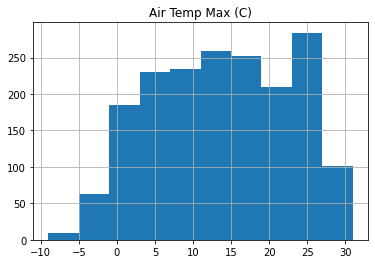

In [8]:
precip.hist('Air Temp Max (C)')

## Task 3: Data Manipulation

Since many Americans prefer the Fahrenheit system, let's create two new columns in our DataFrame called `Air Temp Max (F)` and `Air Temp Min (F)`. Use an `apply()` function to convert the columns in Celsius to Fahrenheit ([Reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)).

The conversion formula is:

$F=\frac{9}{5}C+32$

*Hint: If we wanted to add 1 to each value in a column, we'd use:*

`df['column_new'] = df['column'].apply(lambda x: x + 1)`


In [9]:
precip['Air Temp Max (F)'] = precip['Air Temp Max (C)'].apply(lambda x: (9/5)*x + 32)
precip['Air Temp Min (F)'] = precip['Air Temp Min (C)'].apply(lambda x: (9/5)*x + 32)

Subset the DataFrame on `Air Temp Max (C)` and `Air Temp Max (F)`. Use the `head()` function to print the first few rows to help us verify if the conversion was successful.

In [10]:
temp = precip[['Air Temp Max (C)','Air Temp Max (F)']]
temp.head()

,Air Temp Max (C),Air Temp Max (F)
0,16,60.8
1,22,71.6
2,24,75.2
3,26,78.8
4,25,77.0


Earlier, you may have noticed that the `24-hour Total Precip (mm)`, `New Snow (cm)`, `Snowpack depth (cm)`, and `Snow Water Equivalent (cm)` columns are Dtype `object`. We'd typically expect a measurement like these to be read in as a numeric type such as `float64`. This typing suggests that there might be an issue with the data. We won't be able to perform any meaningful analysis until it is remedied.

In the documentation for this dataset, a section titled **Usage Notes** states:

> *Snowfall amounts < 0.5 cm when measured with the snow board and ruler were labelled as "Trace" or "T" accumulations. Missing values recorded as "NA."*

First, count the number of rows in the `24-hour Total Precip (mm)` column labeled `T` by subsetting the DataFrame on rows that match this condition. Use `len()` to get the number of matching rows ([Reference](https://www.geeksforgeeks.org/python-len-function/)).

*Hint: You may use this format to select rows matching a condition:*

`df[df['column'] == 'condition']`

In [11]:
precip[precip['24-hour Total Precip (mm)'] == 'T']

,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm),Air Temp Max (F),Air Temp Min (F)
45,11/15/14,5,-5,T,88,NaN,100.0,0,18.5,0,0,41.0,23.0
78,12/18/14,4,-3,T,457,100.0,NaN,5,152.0,66.5,--,39.2,26.6
103,1/12/15,7,-3,T,513,100.0,NaN,0,179.5,53,17.3,44.6,26.6
144,2/22/15,1,-7,T,706,100.0,NaN,T,213.5,20,--,33.8,19.4
183,4/2/15,7,-5,T,777,100.0,NaN,T,251.5,T,--,44.6,23.0
269,6/27/15,27,12,T,1001,NaN,100.0,0,330.5,0,0,80.6,53.6
270,6/28/15,25,11,T,1001,NaN,100.0,0,330.5,0,0,77.0,51.8
271,6/29/15,26,12,T,1001,NaN,100.0,0,330.5,0,0,78.8,53.6
276,7/4/15,23,11,T,1005,NaN,100.0,0,330.5,0,0,73.4,51.8
279,7/7/15,22,9,T,1005,NaN,100.0,0,330.5,0,0,71.6,48.2


We'll consider trace amounts of precipitation to be negligible. Use a conditional statement to recode `T` measurements to `0`; we'll handle "NA" values later.

*Hint: The syntax for conditional DataFrame operations should be in the form:*

`df['column'] = [0 if x == 'condition' else x for x in df['column']]`

In [12]:
precip['24-hour Total Precip (mm)'] = [0 if x == 'T' else x for x in precip['24-hour Total Precip (mm)']]

Next, simplify things by using the `replace()` method instead ([Reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)). We can address the remaining problematic columns by calling this on the entire DataFrame. This function can also be run on a subset of columns to prevent accidental replacements.

Substitute each remaining `T` with `0`.

*Hint: The syntax to replace values in a DataFrame is:*

`df.replace(to_replace='value', value='new_value')`

In [13]:
precip['24-hour Total Precip (mm)'].replace(to_replace='T', value='0')

0        0
1        0
2        0
3        0
4        0
        ..
1821     0
1822     0
1823     9
1824     4
1825    11
Name: 24-hour Total Precip (mm), Length: 1826, dtype: object

Since there are only a few missing values in the `Snow Water Equivalent (cm)` column, let's drop them. Use `dropna()` to drop missing values in this column. Remember to use `inplace=True` or save to a new DataFrame to preserve your changes.

In [14]:
precip['Snow Water Equivalent (cm)'].dropna(inplace=True)

## Task 4: Export Data

Export the revised dataset to your Google Drive or download a copy for next week's assignment.

In [15]:
precip.to_csv('revised_precip.csv')
from google.colab import files
files.download('revised_precip.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Task 5: Thought Question

> *Many values in the `% of Precip as Snow` and `% of Precip as Rain` columns are `NA`. How should we handle these?*

It seems like considering a small proportion of these values are present (around 22% and 18%, respectively), we should probably delete these two columns. It doesn't seem like there is enough data comparatively to make a meaningful contribution to the analysis going forward.